In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
ccdnamenumdict = {'S1': 25, 'S2': 26, 'S3': 27, 'S4':28,
                  'S5': 29, 'S6': 30, 'S7': 31,
                  'S8': 19, 'S9': 20, 'S10': 21, 'S11': 22, 'S12': 23,
                  'S13': 24,
                  'S14': 13, 'S15': 14, 'S16': 15, 'S17': 16, 'S18': 17,
                  'S19': 18,
                  'S20': 8, 'S21': 9, 'S22': 10, 'S23': 11, 'S24': 12,
                  'S25': 4, 'S26': 5, 'S27': 6, 'S28': 7,
                  'S29': 1, 'S30': 2, 'S31': 3,
                  'N1': 32, 'N2': 33, 'N3': 34, 'N4': 35,
                  'N5': 36, 'N6': 37, 'N7': 38,
                  'N8': 39, 'N9': 40, 'N10': 41, 'N11': 42, 'N12': 43,
                  'N13': 44,
                  'N14': 45, 'N15': 46, 'N16': 47, 'N17': 48, 'N18': 49,
                  'N19': 50,
                  'N20': 51, 'N21': 52, 'N22': 53, 'N23': 54, 'N24': 55,
                  'N25': 56, 'N26': 57, 'N27': 58, 'N28': 59,
                  'N29': 60, 'N30': 61, 'N31': 62,
                  }

fringe_dir = '/global/homes/d/djschleg/cosmo/staging/decam/DECam_CP-Fringe'
image_dir = '/global/project/projectdirs/cosmo/staging/'
surveyccd_path = '/global/project/projectdirs/cosmo/work/legacysurvey/dr9/survey-ccds-decam-dr9-cut.fits.gz'
# blob_dir = '/global/project/projectdirs/desi/users/rongpu/dr9/decam_ccd_blob_mask'
blob_dir = '/global/cscratch1/sd/rongpu/fringe/decam_ccd_blob_mask'

sky_dir = '/global/project/projectdirs/desi/users/rongpu/dr9/fringe/smooth_sky'
plot_dir = '/global/project/projectdirs/desi/users/rongpu/dr9/fringe/plots'
output_dir = '/global/project/projectdirs/desi/users/rongpu/dr9/fringe/data'

# Load CCD list
ccd_columns = ['image_filename', 'image_hdu', 'expnum', 'ccdname', 'filter', 'mjd_obs', 'ra', 'dec', 'skyrms', 'ccdraoff', 'ccddecoff', 'ccd_cuts', 'ra_bore', 'dec_bore']
ccd = fitsio.read(surveyccd_path, columns=ccd_columns)
# ccd = fitsio.read(surveyccd_path)
ccd = Table(ccd)
mask = ccd['ccd_cuts']==0
mask &= ccd['filter']=='z' # include only z-band images
ccd = ccd[mask]
print(len(ccd))

1148265


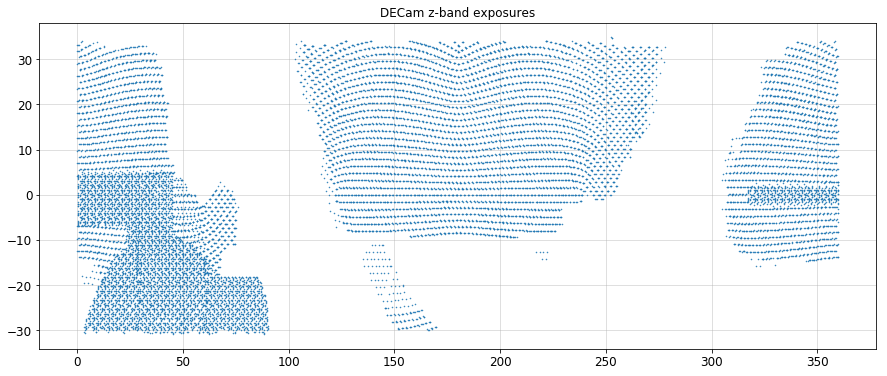

In [4]:
mask = ccd['ccdname']=='N10'
plt.figure(figsize=(15, 6))
plt.plot(ccd['ra_bore'][mask], ccd['dec_bore'][mask], '.', ms=1)
plt.grid(alpha=0.5)
plt.title('DECam z-band exposures')
plt.show()

In [5]:
# Only use exposures in DR8 CCD
ccd_dr8 = fitsio.read('/global/project/projectdirs/cosmo/data/legacysurvey/dr8/survey-ccds-decam-dr8.fits.gz', columns=['expnum'])
mask = np.in1d(ccd['expnum'], np.unique(ccd_dr8['expnum']))
ccd = ccd[mask]
print(len(ccd))

1107350


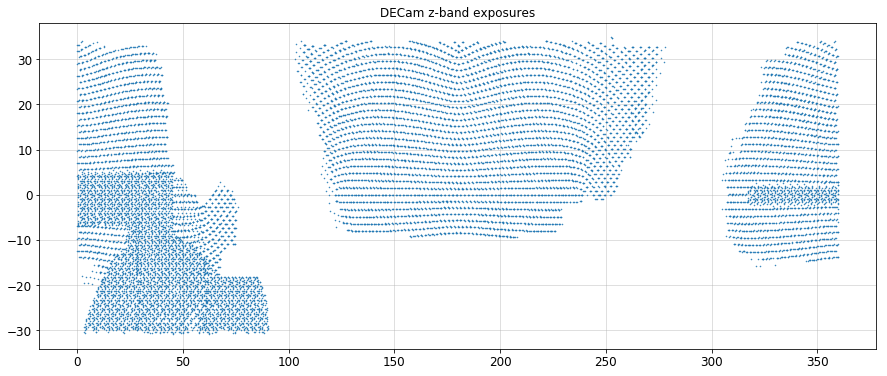

In [6]:
mask = ccd['ccdname']=='N10'
plt.figure(figsize=(15, 6))
plt.plot(ccd['ra_bore'][mask], ccd['dec_bore'][mask], '.', ms=1)
plt.grid(alpha=0.5)
plt.title('DECam z-band exposures')
plt.show()

In [7]:
# Only keep exposures with all 61 CCDs
t = Table()
t['expnum'], t['counts'] = np.unique(ccd['expnum'], return_counts=True)
mask = t['counts']==61
mask_remove = ~np.in1d(ccd['expnum'], t['expnum'][mask])
# print(np.sum(mask_remove), np.sum(~mask_remove))
ccd = ccd[~mask_remove]

# Randomly select some exposures
expnum_all = np.unique(ccd['expnum'])
np.random.seed(123)
expnum_select = np.random.choice(expnum_all, size=180, replace=False)
expnum_select.sort()
mask = np.in1d(ccd['expnum'], expnum_select)
ccd = ccd[mask]
print(len(ccd))

10980


In [8]:
print('Exposures:')
print(np.array2string(expnum_select, separator=', '))

Exposures:
[243575, 257579, 608237, 613691, 615457, 617149, 625647, 625963, 625984,
 626013, 626022, 626369, 626404, 630676, 630764, 630767, 630920, 630975,
 631032, 631079, 635121, 637641, 640631, 640713, 641990, 642213, 648115,
 648436, 648438, 648446, 648449, 648503, 649869, 649876, 649925, 660071,
 662042, 663660, 666027, 666048, 675281, 675757, 676897, 677354, 677384,
 678507, 683976, 685495, 685846, 685852, 690311, 690318, 690446, 690452,
 690465, 690480, 690495, 690809, 690810, 691185, 692345, 693115, 693133,
 695083, 695086, 695092, 695470, 695823, 696082, 698757, 698762, 699867,
 700267, 702094, 702347, 705161, 714405, 715780, 716059, 716111, 717412,
 718693, 719083, 719086, 719104, 719810, 720123, 720132, 720140, 721256,
 721400, 723171, 723176, 724737, 725084, 725092, 725112, 730384, 731280,
 731283, 731401, 745654, 746829, 747025, 759175, 763430, 764325, 764460,
 766535, 766609, 766944, 767015, 767038, 767350, 767357, 767359, 767361,
 767551, 767553, 767576, 767946, 767975,